In [2]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
processed_data = np.load('Full_array.npy')

from tensorflow import keras

import pandas as pd

#The size of the dataset is 10,000; but I only filled the first 9166 with values, the rest are zeros.
number = 9166
processed_data = processed_data[0:number]

np.random.seed(1)
tf.set_random_seed(1)

In [3]:
#hyperparameters:
test_train_split = 0.85
batch_size = 32
epoch_number = 15
learning_rate = 0.1
dropout_rate = 0.4
CNL1_filters = 32
CNL1_kernal_size = 5
MPL1_pool_size= (2,2)
MPL1_strides = 2
CNL2_filters = 64
CNL2_kernal_size = 5
MPL2_pool_size = (2,2)
MPL2_strides = 2

#I have a non-round number of examples
train_split_indice = int(np.round(test_train_split*number))

In [4]:
#Load in my dataset of targets, targets are strings labels under the name "Class"
galaxyzoo = pd.read_csv("zoo2MainSpecz.csv/zoo2MainSpecz.csv", usecols=[2,3,4,8], nrows=number)
Class = galaxyzoo["gz2class"].values
RA = galaxyzoo['ra'].values
DEC = galaxyzoo['dec'].values

In [5]:
#I want to take the first character of the Class string and interpret as a integer, ala MNIST example code
dictionary = {'A':int(2),'E':int(1),'S':int(0)}

In [6]:
#resave using my dictionary
target = np.empty((len(Class)))
for i in range(len(Class)):
    target[i] = int(dictionary[Class[i][0]])

In [7]:
#split my data between training and test sets
train_target = target[0:train_split_indice]
test_target = target[train_split_indice:number]
train_images = processed_data[0:train_split_indice]
test_images = processed_data[train_split_indice:number]

train_images = train_images.reshape(train_split_indice,28,28,1)
test_images = test_images.reshape(train_split_indice-number,28,28,1)

In [8]:
#define my model, using a CNN with 2 CNL layers, 2 max pool layers, 1 dense layer, 1 drop out layer, and another dense layer 
model = keras.Sequential([])
model.add(keras.layers.Conv2D(input_shape=(28,28,1),filters=CNL1_filters,kernel_size=CNL1_kernal_size,padding="same",activation=tf.nn.relu))
model.add(keras.layers.MaxPool2D(pool_size=MPL1_pool_size, strides=MPL1_strides))
model.add(keras.layers.Conv2D(filters=CNL2_filters,kernel_size=CNL2_kernal_size,padding="same",activation=tf.nn.relu))
model.add(keras.layers.MaxPool2D(pool_size=MPL2_pool_size,strides=MPL2_strides))
model.add(keras.layers.Reshape([7*7*64]))
model.add(keras.layers.Dense(units=1024,activation=tf.nn.relu))
model.add(keras.layers.Dropout(rate=dropout_rate))
model.add(keras.layers.Dense(units=3,activation=tf.nn.softmax))

In [18]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [133]:
#lets get fancy with batching. Lets try something from the internet
#model.fit(train_images, train_target, epochs=epoch_number) #this works though so we can always come back

for i in range(epoch_number):
    model.fit(train_images, train_target, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)

Epoch 1/1
7791/7791 [==============================] - 49s 6ms/step - loss: 0.6750 - acc: 0.7189
Epoch 1/1
7791/7791 [==============================] - 46s 6ms/step - loss: 0.5240 - acc: 0.7605
Epoch 1/1
7791/7791 [==============================] - 46s 6ms/step - loss: 0.5005 - acc: 0.7753
Epoch 1/1
7791/7791 [==============================] - 49s 6ms/step - loss: 0.4991 - acc: 0.7796
Epoch 1/1
7791/7791 [==============================] - 51s 7ms/step - loss: 0.4954 - acc: 0.7719
Epoch 1/1
7791/7791 [==============================] - 51s 7ms/step - loss: 0.4842 - acc: 0.7835
Epoch 1/1
7791/7791 [==============================] - 51s 7ms/step - loss: 0.4868 - acc: 0.7795
Epoch 1/1
7791/7791 [==============================] - 52s 7ms/step - loss: 0.4633 - acc: 0.7931
Epoch 1/1
7791/7791 [==============================] - 51s 7ms/step - loss: 0.4495 - acc: 0.8073
Epoch 1/1
7791/7791 [==============================] - 51s 7ms/step - loss: 0.4411 - acc: 0.8054
Epoch 1/1
7791/7791 [=========

In [124]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
reshape_14 (Reshape)         (None, 3136)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 1024)              3212288   
_________________________________________________________________
dropout_14 (Dropout)         (None, 1024)              0         
__________

In [134]:
test_loss, test_acc = model.evaluate(test_images.reshape(number - train_split_indice,28,28,1), test_target)
print('Test accuracy:', test_acc)

1375/1375 [==============================] - 3s 2ms/step
Test accuracy: 0.8290909091776067


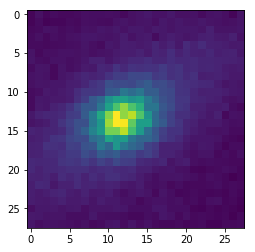

Classification of image: 0.0
indice of image: 1375


In [22]:
plt.imshow(test_images.reshape(number-train_split_indice,28,28)[0])
plt.show()
print("Classification of image:",test_target[0])
print("indice of image:",number-train_split_indice)